# Example ABC analysis of rainfall data

## Data

First I'll load an example rainfall dataset from the `ismev` package.

In [1]:
library(ismev)
data(rain)

Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-7. For overview type 'help("mgcv-package")'.


Its length and typical values are as follows.

In [2]:
length(rain)
summary(rain)

[1] 17531

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.500   3.476   4.300  86.600 

The following plot of the initial two years or so of data shows that non-zero rainfall occurs in clusters. (n.b. I'm not sure what the units of rainfall are! Apparently this is in Stuart Coles' extremes textbook.)

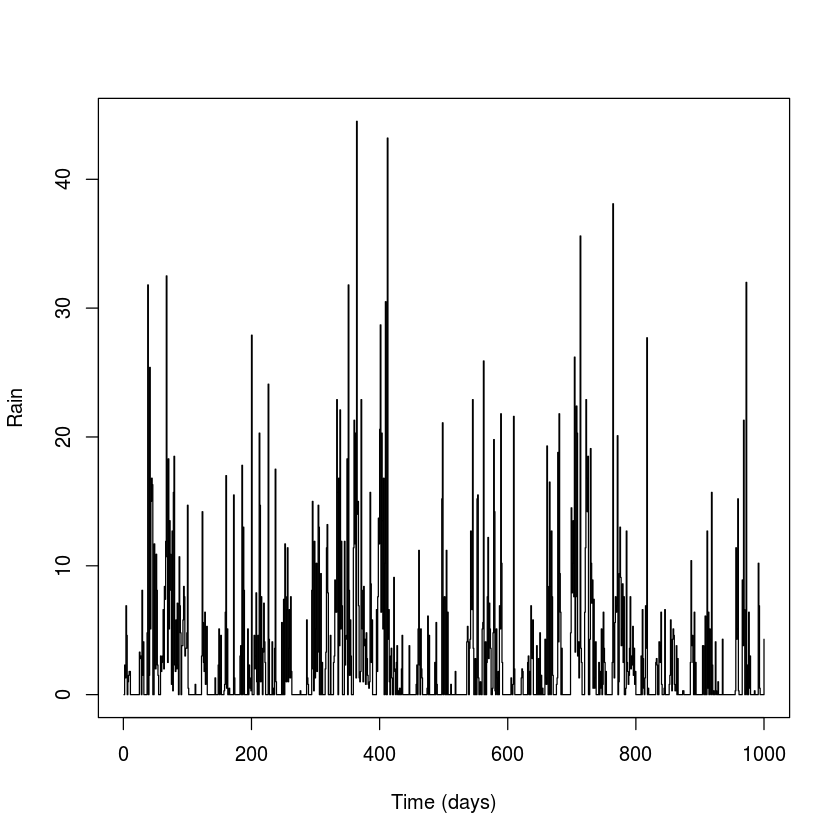

In [3]:
plot(rain[1:1000], type='s', xlab="Time (days)", ylab="Rain")


## Analysis

Load the `rainfallABC` package:

In [4]:
library(rainfallABC)

This package requires as input:

1. A function which draws from the prior.
2. A function which takes a vector of parameters and returns a simulated data object.
3. A list of functions which take data objects and return summary statistics. Several such functions are supplied by the package.

Below is a function to sample from the prior. This distributions is very arbitrary and doesn't reflect any expert knowledge!

In [5]:
rprior = function() {
    c(lambda = runif(1, 0, 2),
      mu_x = runif(1, 0, 50),
      eta = runif(1, 0, 10))
}

Next is a function to do a very simple Neymann-Scott simulation. Note that 17531 is the number of days simulated, to match the observed dataset. This is hard-coded as this function will be run in parallel and so won't have access to global variables.

In [6]:
doSim = function(pars) {
    rainfallABC::sim_simple_data(pars[1], pars[2], pars[3], 17531, 1, bartlett_lewis=FALSE)
}

Now these functions are used in an ABC analysis.

In [7]:
abcout = ABC(1000, rprior, doSim, list(mean_overall, prop_dry, cor_overall, max_rain), rain)

Plot the approximate posterior sample. First marginal plots.

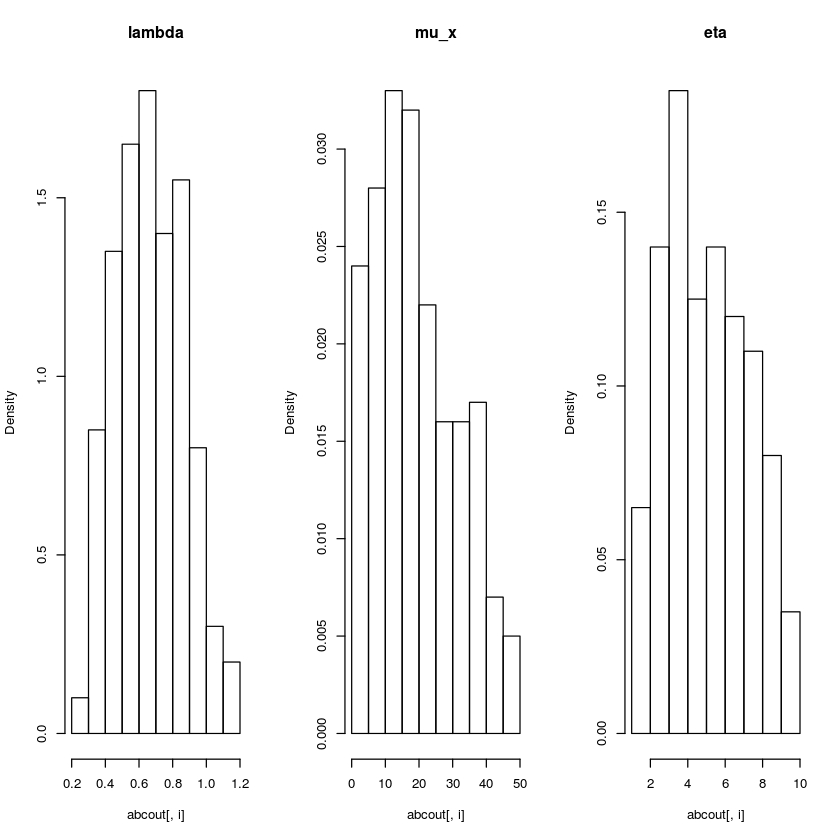

In [12]:
par(mfrow=c(1,3))
for (i in 1:3) hist(abcout[,i], main=names(abcout)[i], freq=FALSE)

Next bivariate plots.

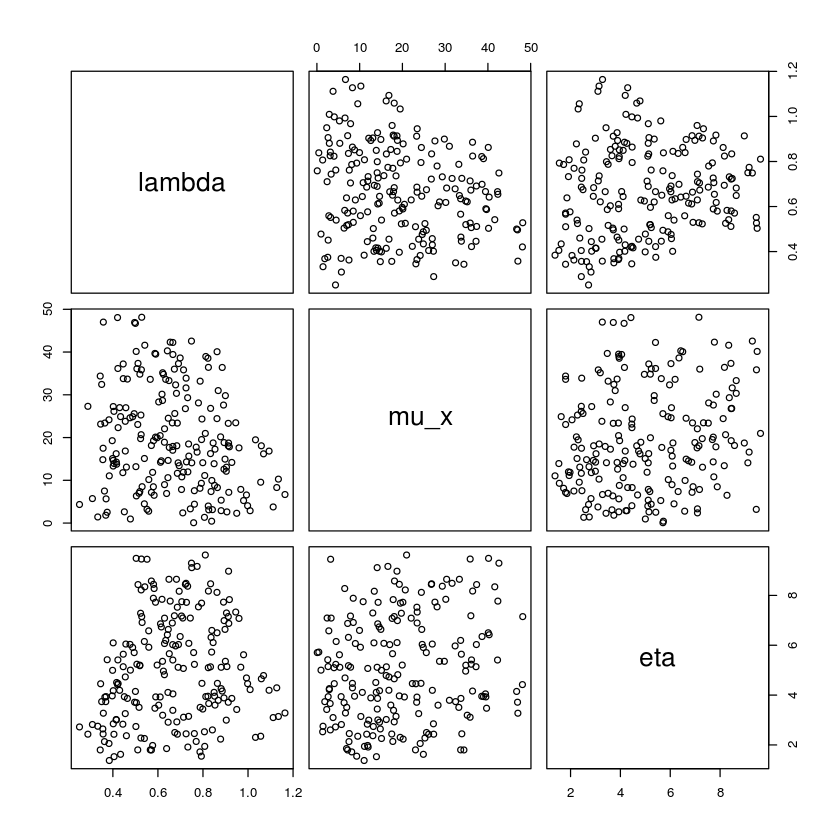

In [11]:
pairs(abcout[1:3])